
# Projeto 1: Estratégia Anti-Crise - Análise Técnica usando médias móveis em ALPA4. (+300% contra -90% do ativo)

### Desafio:

* Testar historicamente um modelo que compra e venda ALPA4 baseado no cruzamento de médias móveis. 

### Passo a passo:

   **Passo 1** - Importar as bibliotecas.
   
   **Passo 2** - Pegar os dados do Yahoo Finance.
   
   **Passo 3** - Definir as janelas das médias móveis. 
   
   **Passo 4** - Calcular as médias móveis.
   
   **Passo 5** - Calcular o retorno diário da ação.
   
   **Passo 6** - Criar os sinais de compra ou venda. 
   
   **Passo 7** - Calcular o retorno do modelo.
   
   **Passo 8** - Calcular o retorno da ação e do Ibovespa no mesmo período.

   **Passo 9** - Criar o gráfico de retornos para observar o resultado da estratégia.

   **Passo 10** - Otimizar os parâmetros pra gerar melhores resultados.

   ***
   
-------------------

# Passo 1 - Importar as bibliotecas

In [ ]:
!pip install yfinance==0.2.58

In [ ]:
!pip install mplcyberpunk

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

# Passo 2 - Pegar os dados do Yahoo Finance

In [ ]:
ticker = "ALPA4.SA"
tabela_de_dados = yf.download(ticker, start = "2021-05-27", end = "2025-04-30", auto_adjust = False)

tabela_de_dados

# Passo 3 - Definir as janelas das médias móveis

In [ ]:
janela_rapida = 7
janela_lenta = 40

# Passo 4 - Calcular as médias móveis

In [ ]:
tabela_de_dados["Média Rápida"] = tabela_de_dados["Adj Close"].rolling(window = janela_rapida).mean()
tabela_de_dados["Média Lenta"] = tabela_de_dados["Adj Close"].rolling(window = janela_lenta).mean()

tabela_de_dados

# Passo 5 - Calcular o retorno diário da ação

In [ ]:
tabela_de_dados["retorno_diario"] = tabela_de_dados["Adj Close"].pct_change()
tabela_de_dados = tabela_de_dados.dropna()

tabela_de_dados

# Passo 6 - Criar os sinais de compra ou venda

In [ ]:
#se eu tiver comprado, 1
#se eu tiver neutro é 0
#se eu tiver vendido é -1

tabela_de_dados["comprado_ou_vendido"] = 0
tabela_de_dados["comprado_ou_vendido"] = np.where(tabela_de_dados["Média Rápida"] > tabela_de_dados["Média Lenta"], 1, -1)
tabela_de_dados

In [ ]:
tabela_de_dados["comprado_ou_vendido"] = tabela_de_dados["comprado_ou_vendido"].shift(1)
tabela_de_dados

In [ ]:
tabela_de_dados

# Passo 7 - Calcular o retorno do modelo

In [ ]:
tabela_de_dados["retorno_modelo"] = tabela_de_dados["retorno_diario"] * tabela_de_dados["comprado_ou_vendido"]
tabela_de_dados["retorno_acumulado_modelo"] = (1 + tabela_de_dados["retorno_modelo"]).cumprod() - 1

In [ ]:
tabela_de_dados

# Passo 8 - Calcular o retorno da ação e do Ibovespa no mesmo período

In [30]:
tabela_de_dados["retorno_acum_acao"] = (1 + tabela_de_dados["retorno_diario"]).cumprod() - 1

In [ ]:
ibov = yf.download("^BVSP", start = tabela_de_dados.index[0], 
                   end = "2025-04-30", auto_adjust = False)["Adj Close"]

ibov

In [ ]:
tabela_de_dados["retorno_ibov"] = ibov.pct_change().values

tabela_de_dados

In [ ]:
tabela_de_dados["retorno_acum_ibov"] = (1 + tabela_de_dados["retorno_ibov"]).cumprod() - 1

# Passo 9 - Criar o gráfico de retornos para observar o resultado da estratégia.

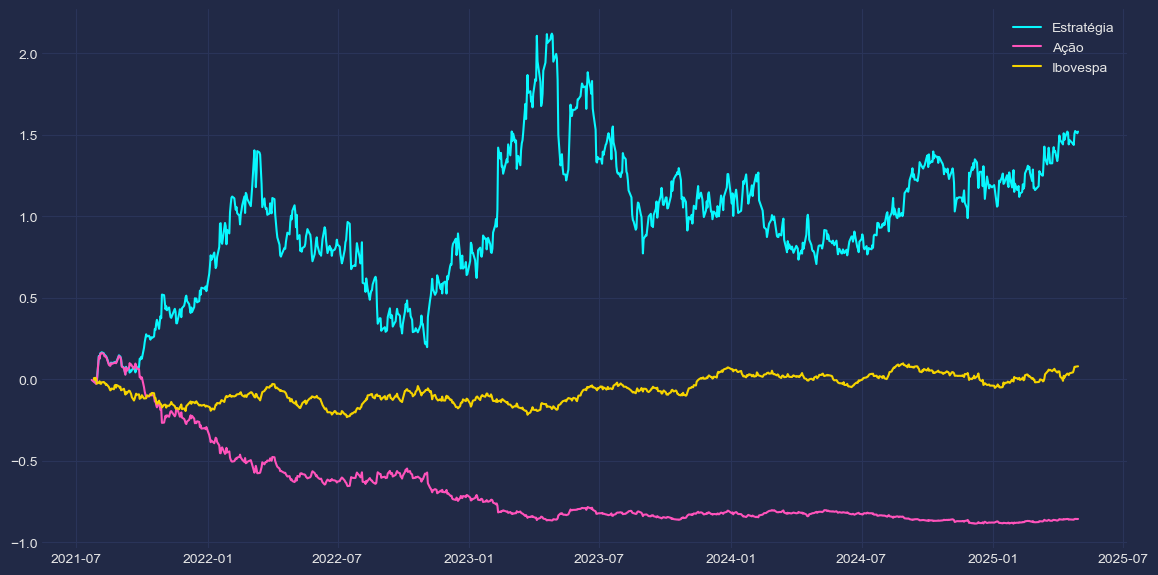

In [31]:
plt.figure(figsize = (14, 7))
plt.plot(tabela_de_dados["retorno_acumulado_modelo"], label = "Estratégia")
plt.plot(tabela_de_dados["retorno_acum_acao"], label = "Ação")
plt.plot(tabela_de_dados["retorno_acum_ibov"], label = "Ibovespa")
plt.legend()
plt.show()

In [32]:
tabela_de_dados

Price,Adj Close,Close,High,Low,Open,Volume,Média Rápida,Média Lenta,retorno_diario,comprado_ou_vendido,retorno_modelo,retorno_acumulado_modelo,retorno_ibov,retorno_acum_ibov,retorno_acum_acao
Ticker,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,,,,,,,,,
Date,,,,,,,,,,,,,,,
2021-07-23,51.019665,52.449509,53.009075,52.039825,52.749275,1268778,50.890529,48.703417,-0.003607,NaN,NaN,NaN,NaN,NaN,-0.003607
2021-07-26,50.446190,51.859962,52.969109,51.670109,52.969109,1088239,50.846095,48.847271,-0.011240,1.0,-0.011240,-0.011240,0.007605,0.007605,-0.014806
2021-07-27,50.271233,51.680103,51.829987,50.590942,51.700089,2018557,50.782222,48.961236,-0.003468,1.0,-0.003468,-0.014669,-0.011047,-0.003527,-0.018223
2021-07-28,50.125431,51.530216,52.149738,50.980640,51.620148,2620821,50.660028,49.065239,-0.002900,1.0,-0.002900,-0.017527,0.013434,0.009860,-0.021071
2021-07-29,49.804680,51.200474,51.959885,50.880718,51.410313,1792482,50.462854,49.141297,-0.006399,1.0,-0.006399,-0.023814,-0.004838,0.004974,-0.027335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,7.140000,7.140000,7.330000,7.120000,7.210000,3467800,7.242857,6.932408,-0.002793,1.0,-0.002793,1.437738,0.013429,0.057280,-0.860559
2025-04-24,7.340000,7.340000,7.400000,7.190000,7.220000,1789900,7.251429,6.949929,0.028011,1.0,0.028011,1.506022,0.017880,0.076184,-0.856653


# Passo 10: Otimizar os resultados